<a href="https://colab.research.google.com/github/RafalDoroz/ai/blob/main/CNN_CustomFolders_TestFrom3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 CNN Keras – klasyfikacja obrazów z dwóch folderów + test pojedynczego obrazu

W tym notebooku możesz podać nazwy katalogów z danymi treningowymi i testowym obrazem ręcznie.

In [27]:
!pip install tensorflow matplotlib

In [28]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing import image

## 📁 Podaj nazwy folderów

In [29]:
# 📝 Podaj nazwy katalogów
folder1 = '1'  # nazwa folderu z klasą 0
folder2 = '2'  # nazwa folderu z klasą 1
test_image_path = '3/002_08.PNG'  # pojedynczy obraz testowy

# Tworzymy tymczasowy katalog ze strukturą wymaganą przez TensorFlow
import shutil
os.makedirs('temp_data', exist_ok=True)
if os.path.exists('temp_data/0'):
    shutil.rmtree('temp_data/0')
if os.path.exists('temp_data/1'):
    shutil.rmtree('temp_data/1')
shutil.copytree(folder1, 'temp_data/0')
shutil.copytree(folder2, 'temp_data/1')

'temp_data/1'

In [30]:
IMG_SIZE = (64, 64)
BATCH_SIZE = 16
EPOCHS = 10

In [31]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='temp_data',
    labels='inferred',
    label_mode='int',
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='temp_data',
    labels='inferred',
    label_mode='int',
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

Found 6 files belonging to 2 classes.
Using 5 files for training.
Found 6 files belonging to 2 classes.
Using 1 files for validation.


In [32]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6000 - loss: 0.6852 - val_accuracy: 0.0000e+00 - val_loss: 1.6780
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.6000 - loss: 0.7838 - val_accuracy: 0.0000e+00 - val_loss: 0.8464
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.6000 - loss: 0.6581 - val_accuracy: 1.0000 - val_loss: 0.6642
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 1.0000 - loss: 0.6734 - val_accuracy: 0.0000e+00 - val_loss: 0.7033
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 1.0000 - loss: 0.6543 - val_accuracy: 0.0000e+00 - val_loss: 0.8007
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.6000 - loss: 0.6320 - val_accuracy: 0.0000e+00 - val_loss: 0.9244
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.6000 - loss: 0.6136 - val_accuracy: 0.0000e+00 - val_loss: 0.9450
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.6000 - loss: 0.5907 - val_accurac

In [34]:
loss, acc = model.evaluate(val_ds)
print(f"\n✅ Dokładność na danych walidacyjnych: {acc * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.0000e+00 - loss: 0.7949

✅ Dokładność na danych walidacyjnych: 0.00%


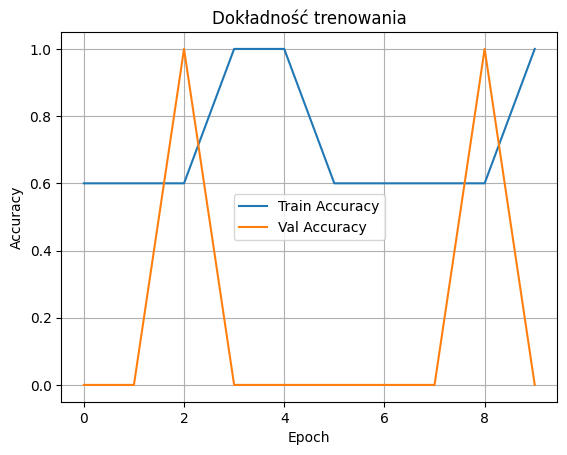

In [35]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Dokładność trenowania')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
def predict_single_image(img_path, model, img_size=IMG_SIZE):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    print(f"🔍 Plik: {img_path}")
    print(f"🔢 Przewidziana klasa: {predicted_class} (folder {'1' if predicted_class == 0 else '2'})")

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class}")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
🔍 Plik: 3/002_08.PNG
🔢 Przewidziana klasa: 0 (folder 1)


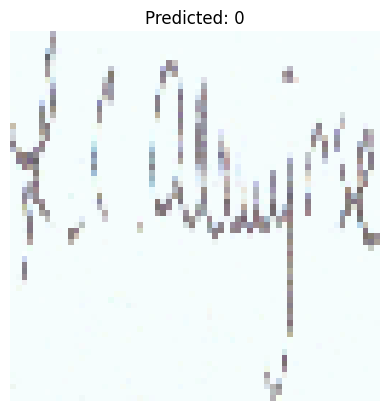

In [37]:
# 🔎 Przetestuj pojedynczy obraz z folderu testowego
predict_single_image(test_image_path, model)